# **kNN: Regression**


## Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset


### Import dataset

In [0]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

### Explore dataset

In [3]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [5]:
df_weather.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,16.810959,9.095890,19.624658,10.106849,15.487671,14.958904,3.015890,80.095890,9.428767,1019.038356,50.130137,17.142466,10.945205,10.989041,168.512329,164.419178,181.638356,0.0,1.380822,9.315890,6.526027,15.720548
std,6.712698,4.814026,8.151987,5.128254,6.565644,6.789290,5.697129,10.413649,2.221039,9.114272,27.397286,7.114563,4.190159,6.980341,77.739513,78.205120,86.458436,0.0,1.279665,3.608357,3.452584,8.808321
min,5.000000,-1.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,41.000000,5.000000,987.000000,0.000000,5.000000,1.000000,-4.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,11.000000,5.000000,14.000000,6.000000,11.000000,10.000000,0.000000,75.000000,8.250000,1014.000000,27.375000,12.000000,8.000000,5.000000,116.000000,116.000000,116.000000,0.0,1.000000,6.500000,4.000000,8.000000
50%,16.000000,9.000000,18.000000,10.000000,15.000000,14.000000,0.700000,82.000000,9.500000,1020.000000,54.125000,16.000000,11.000000,10.000000,122.000000,119.000000,122.000000,0.0,1.000000,9.300000,7.000000,16.000000
75%,21.000000,13.000000,25.000000,14.000000,20.000000,19.000000,3.800000,88.000000,10.000000,1024.000000,71.750000,23.000000,14.000000,17.000000,176.000000,176.000000,176.000000,0.0,1.000000,11.600000,10.000000,23.000000
max,39.000000,25.000000,46.000000,25.000000,36.000000,37.000000,47.600000,98.000000,20.000000,1040.000000,99.875000,41.000000,25.000000,29.000000,386.000000,353.000000,389.000000,0.0,7.000000,16.000000,12.000000,31.000000


### Data vizualisation

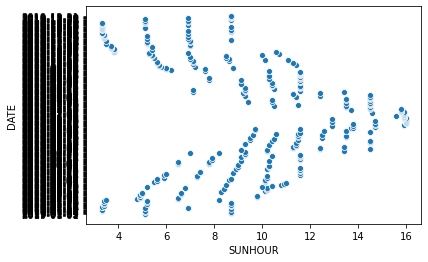

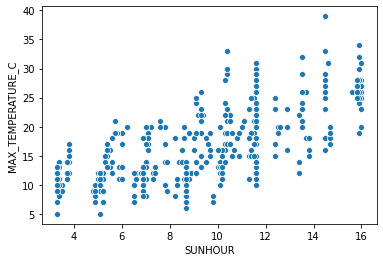

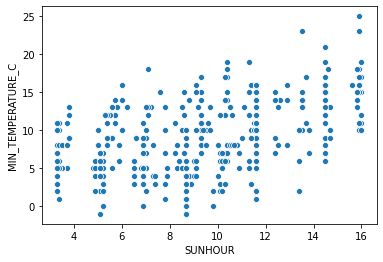

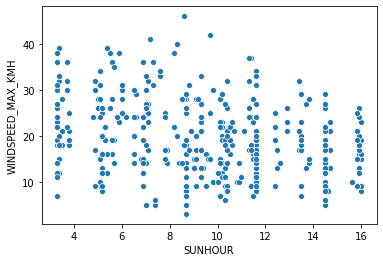

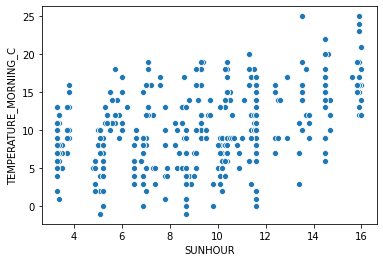

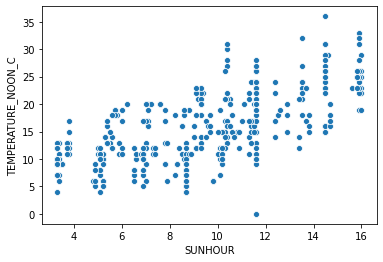

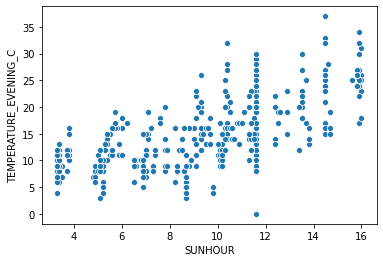

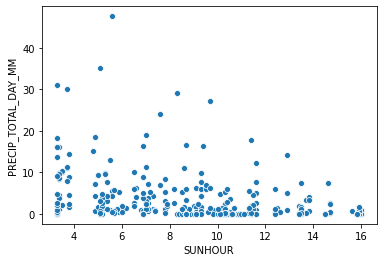

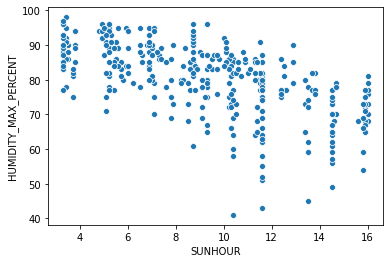

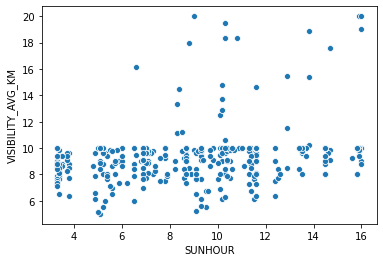

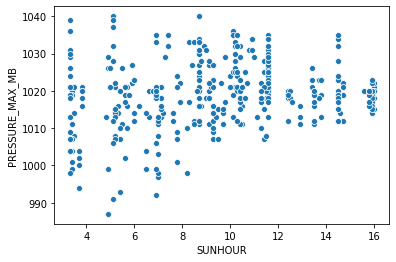

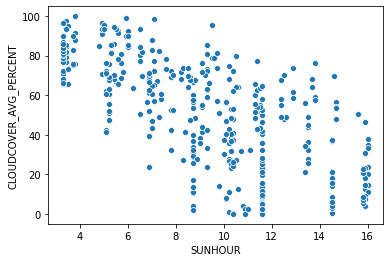

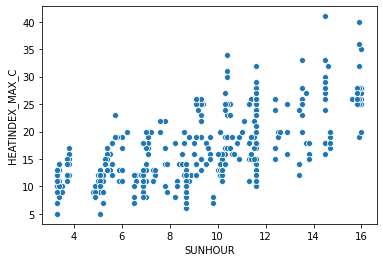

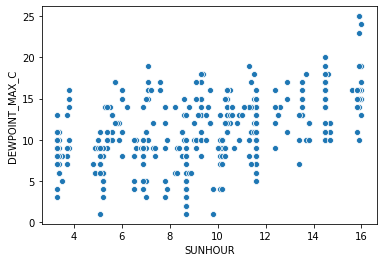

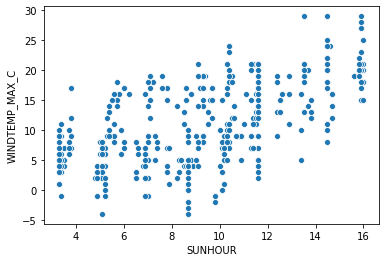

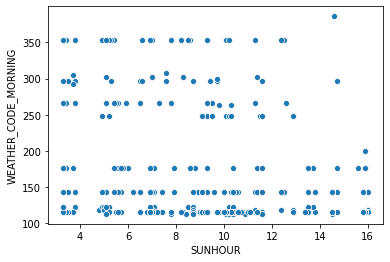

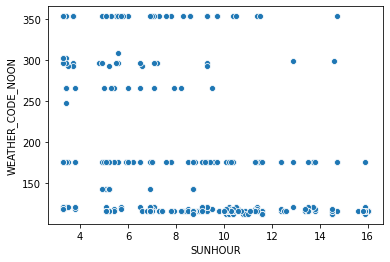

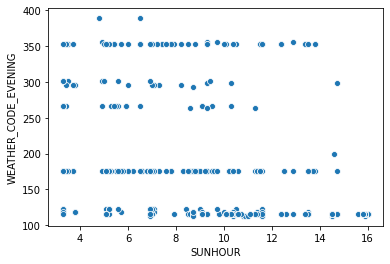

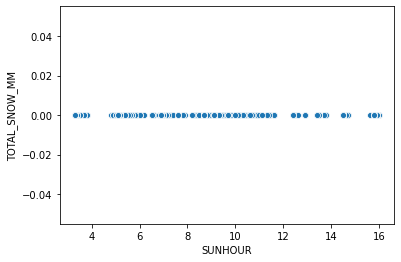

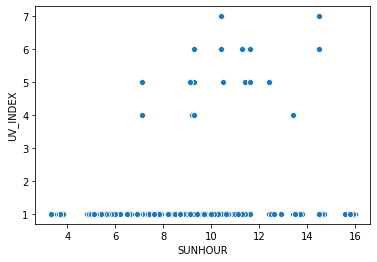

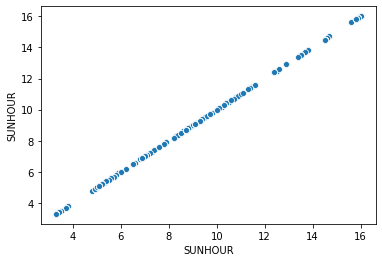

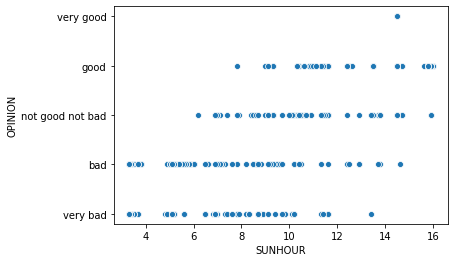

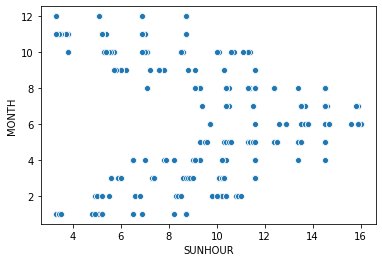

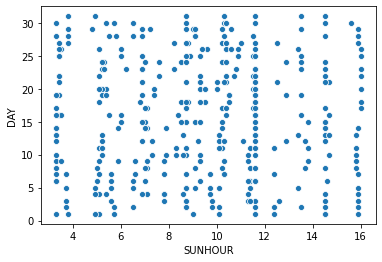

In [6]:
for i in df_weather.columns: 
  sns.scatterplot('SUNHOUR', i, data = df_weather)
  plt.show()

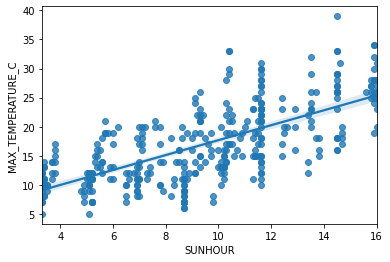

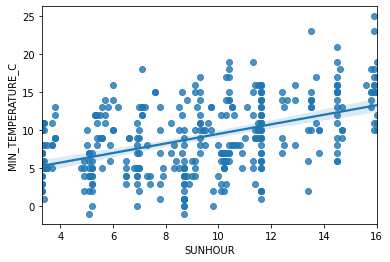

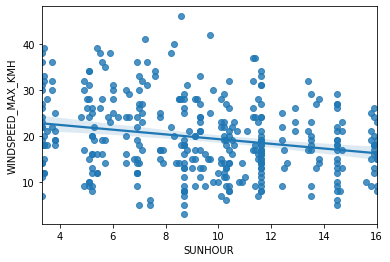

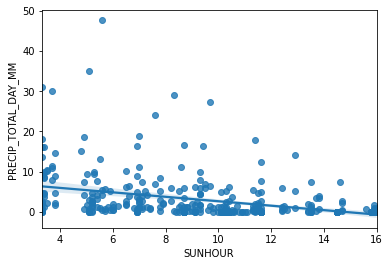

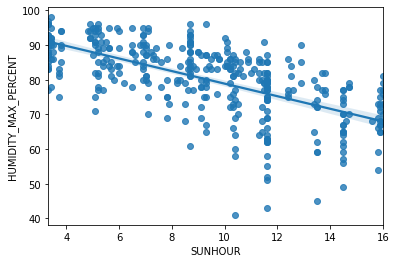

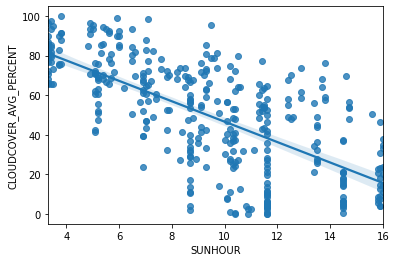

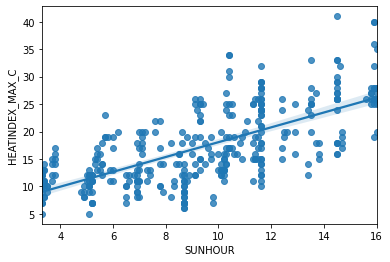

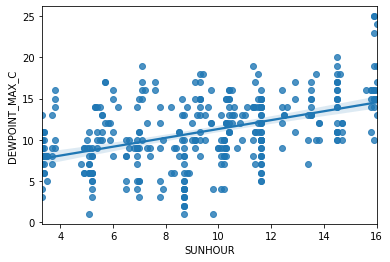

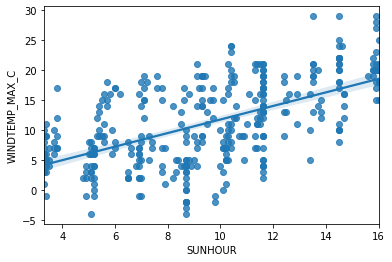

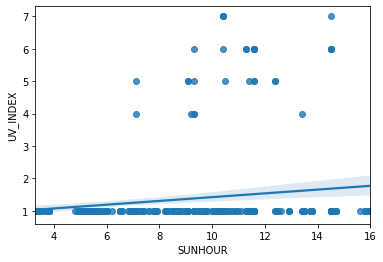

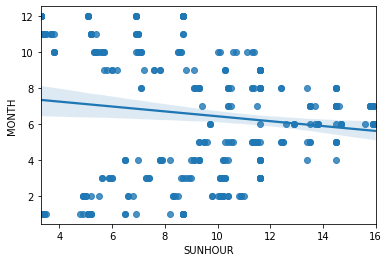

In [7]:
columns = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 
           'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'CLOUDCOVER_AVG_PERCENT',
           'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'UV_INDEX', 'MONTH']

for i in columns: 
  sns.regplot('SUNHOUR', i, data = df_weather)
  plt.show()

## Modelisation

## With one variable

In [8]:
score_max = 0
for i in columns:
  # split train and test sets
  y = df_weather['SUNHOUR']
  X = df_weather[[i]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
  for k in range(1, 101):
    # Initialisation and training
    kNNRegModel = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    score = kNNRegModel.score(X_test, y_test)
    if abs(score) > abs(score_max):
      score_max = score
      n_neighbors = k
      variable = i 
print('Best kNNRegr model with :\n - variable : {} \n - n_neighbors = {} \n - R2 = {} \n'.format(variable, n_neighbors, score_max))

y = df_weather['SUNHOUR']
X = df_weather[[variable]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
LRmodel = LinearRegression().fit(X_train, y_train)
print('Linear Regression model R2 :', LRmodel.score(X_test, y_test))

Best kNNRegr model with :
 - variable : MONTH 
 - n_neighbors = 10 
 - R2 = 0.6779936243048017 

Linear Regression model R2 : -0.0249062281476653
